In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [49]:
from datetime import datetime

In [2]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
CSV_PATH = os.path.join('..', 'data_raw', 'employment_all_in_thousands.xlsx')
df = pd.read_excel(CSV_PATH, skiprows=12)
df.head(15)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,109197,109435,109644,109688,109839,109857,109824.0,109617.0,109520.0,109367.0,109213.0,109167.0
1,1991,109056,108735,108576,108367,108251,108337,108292.0,108313.0,108338.0,108357.0,108297.0,108330.0
2,1992,108372,108313,108368,108523,108652,108719,108794.0,108929.0,108963.0,109144.0,109277.0,109499.0
3,1993,109799,110047,109999,110302,110573,110752,111057.0,111211.0,111452.0,111737.0,111990.0,112319.0
4,1994,112601,112785,113248,113592,113928,114242,114613.0,114902.0,115251.0,115464.0,115876.0,116171.0
5,1995,116508,116702,116913,117076,117056,117293,117386.0,117642.0,117881.0,118038.0,118182.0,118328.0
6,1996,118323,118744,119001,119168,119496,119778,120020.0,120207.0,120418.0,120674.0,120969.0,121152.0
7,1997,121372,121682,121999,122296,122557,122825,123119.0,123099.0,123594.0,123940.0,124246.0,124559.0
8,1998,124823,125024,125174,125453,125855,126087,126213.0,126551.0,126764.0,126968.0,127243.0,127607.0
9,1999,127713,128131,128239,128610,128822,129099,129420.0,129576.0,129781.0,130190.0,130479.0,130786.0


In [68]:
employment = df.melt(id_vars=['Year'])
employment.dropna(inplace=True)
employment['value'] = employment['value'].astype('int64')
employment['Year'] = employment['Year'].astype(str)
employment['date'] = employment['variable'] + ' 15, ' + employment['Year']
employment['date'] = pd.to_datetime(employment['date'], format='%b %d, %Y')

In [69]:
employment.head()

,Year,variable,value,date
0,1990,Jan,109197,1990-01-15
1,1991,Jan,109056,1991-01-15
2,1992,Jan,108372,1992-01-15
3,1993,Jan,109799,1993-01-15
4,1994,Jan,112601,1994-01-15


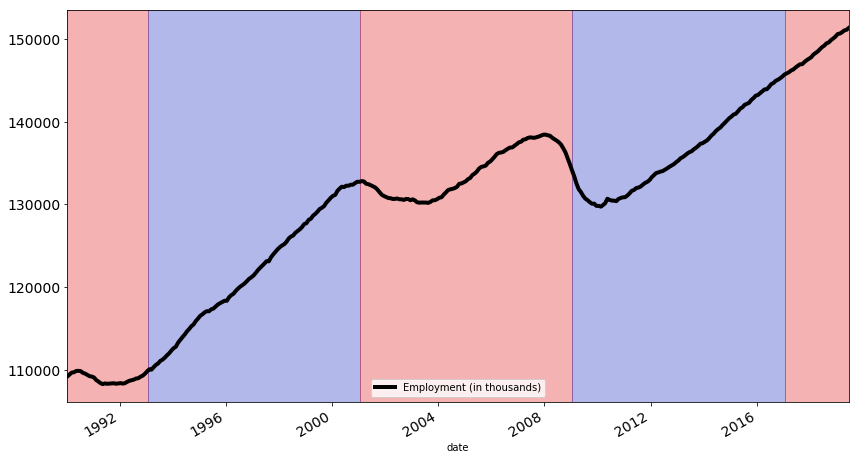

In [70]:
ax = employment.plot(x='date', y='value', figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)


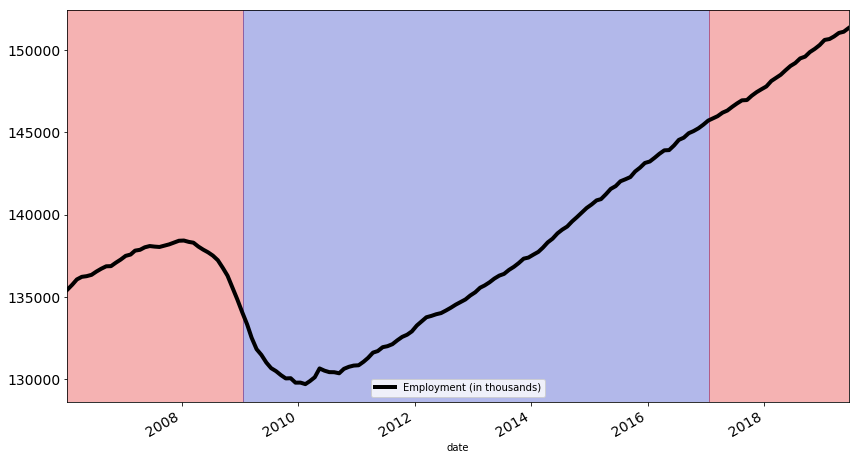

In [76]:
ax = employment[(employment['date'] > '2006') & (employment['date'] < '2020')].plot(x='date', y='value', figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)

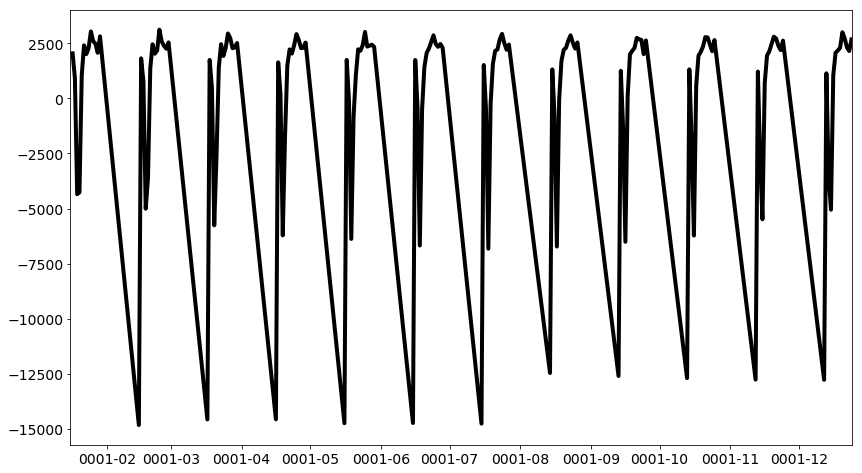

In [79]:
# employment['value'].diff()
ax = employment.loc[(employment['date'] > '2006') & (employment['date'] < '2020'),
                    'value'].diff().plot(x='date', y='value', figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)

In [125]:
emp_df = employment.copy()

In [126]:
emp_df.head()

,Year,variable,value,date
0,1990,Jan,109197,1990-01-15
1,1991,Jan,109056,1991-01-15
2,1992,Jan,108372,1992-01-15
3,1993,Jan,109799,1993-01-15
4,1994,Jan,112601,1994-01-15


In [128]:
emp_df = emp_df.set_index('date').sort_index()

In [119]:
# emp_df.sort_index()

In [129]:
emp_df.head()

,Year,variable,value
date,,,
1990-01-15,1990,Jan,109197
1990-02-15,1990,Feb,109435
1990-03-15,1990,Mar,109644
1990-04-15,1990,Apr,109688
1990-05-15,1990,May,109839


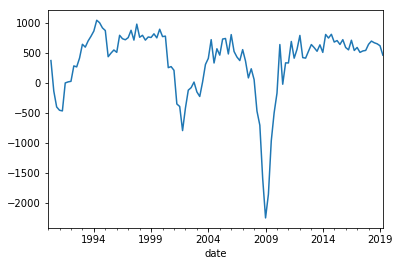

In [139]:
emp_df['value'].resample('Q').mean().diff().plot()

In [131]:
emp_df.loc['2001':'2015'].head()

,Year,variable,value
date,,,
2001-01-15,2001,Jan,132712
2001-02-15,2001,Feb,132804
2001-03-15,2001,Mar,132761
2001-04-15,2001,Apr,132475
2001-05-15,2001,May,132426


In [132]:
emp_df.loc['1996':'2015', 'value']

date
1996-01-15    118323
1996-02-15    118744
1996-03-15    119001
1996-04-15    119168
1996-05-15    119496
1996-06-15    119778
1996-07-15    120020
1996-08-15    120207
1996-09-15    120418
1996-10-15    120674
1996-11-15    120969
1996-12-15    121152
1997-01-15    121372
1997-02-15    121682
1997-03-15    121999
1997-04-15    122296
1997-05-15    122557
1997-06-15    122825
1997-07-15    123119
1997-08-15    123099
1997-09-15    123594
1997-10-15    123940
1997-11-15    124246
1997-12-15    124559
1998-01-15    124823
1998-02-15    125024
1998-03-15    125174
1998-04-15    125453
1998-05-15    125855
1998-06-15    126087
               ...  
2013-07-15    136400
2013-08-15    136642
2013-09-15    136831
2013-10-15    137056
2013-11-15    137323
2013-12-15    137390
2014-01-15    137567
2014-02-15    137735
2014-03-15    137985
2014-04-15    138312
2014-05-15    138533
2014-06-15    138857
2014-07-15    139084
2014-08-15    139272
2014-09-15    139583
2014-10-15    139841
2014-11-

In [133]:
emp_diff = emp_df.loc['1996':'2015', 'value'].diff()

In [134]:
emp_diff.head()

date
1996-01-15      NaN
1996-02-15    421.0
1996-03-15    257.0
1996-04-15    167.0
1996-05-15    328.0
Name: value, dtype: float64

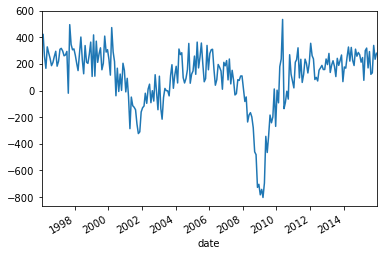

In [136]:
emp_diff['1990':'2020'].plot()

Text(0, 0.5, 'Change in Total Employment \n(in thousands)')

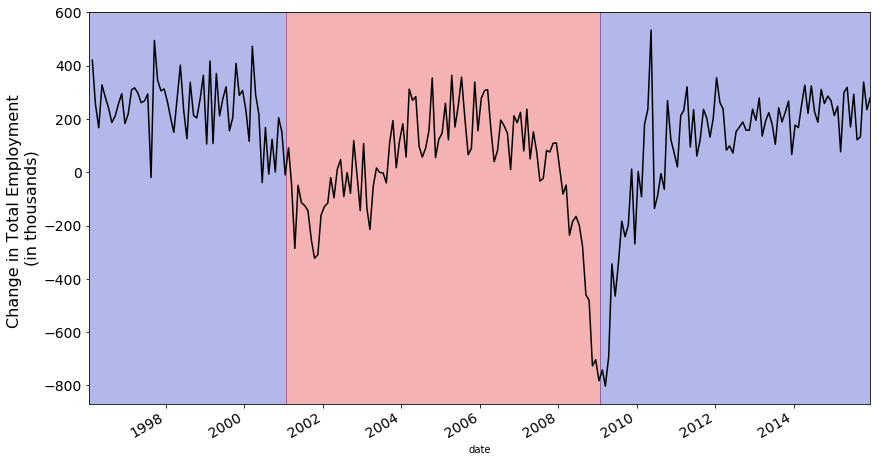

In [146]:
emp_diff = emp_df.loc['1996':'2015', 'value'].diff()
ax = emp_diff['1996':'2015'].plot(x='date', y='value', figsize=(14, 8), linewidth=1.5, color='black', 
                     label='Employment (in thousands)')

ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.set_ylabel('Change in Total Employment \n(in thousands)', fontsize=16)